In [1]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

UsageError: Line magic function `%` not found.


In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("ticks")
sns.set_style("white")
sns.set_palette(sns.color_palette("dark", 8))
plt_colors = sns.color_palette()
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams.update({'font.size': 12})

In [4]:
elec_data = pd.read_csv("../data/electrification.csv")

In [5]:
sp.stats.pearsonr(elec_data["daily_exp"], elec_data["electrification"])

(0.24690479704323848, 0.0)

In [6]:
fold_idx = 21

In [7]:
df = pd.read_csv("../results/fold_india/test_results.csv")

In [8]:
print(df["state_name"][0])

Arunachal Pradesh


In [9]:
df = df.merge(elec_data, how="inner", left_on="id", right_on="village_id")

In [10]:
df = df.loc[:,("smoothed", "true", "lat", "lng", "taluk_idx", "district_idx", "state_idx", "state_name", 
               "electrification", "pop")]
df = df.rename(columns={"smoothed": "pred"})

In [11]:
sp.stats.pearsonr(df["pred"], df["true"])

(0.5966496279025448, 0.0)

In [95]:
print("Length of merged test set: %d" % len(df))

Length of merged test set: 520687


In [96]:
vmin = np.min(np.r_[df["true"], df["pred"]])
vmax = np.max(np.r_[df["true"], df["pred"]])

Text(0.5,1,'Predicted Expenditure')

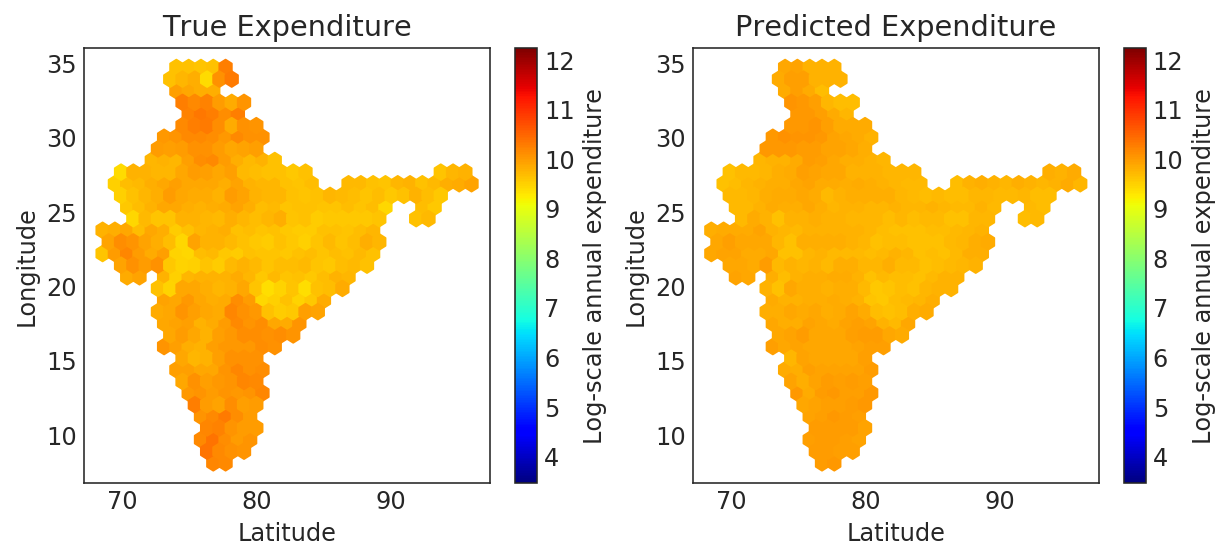

In [97]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.hexbin(df["lng"], df["lat"], C=df["true"], gridsize=30, cmap=mpl.cm.jet, vmax=vmax, vmin=vmin, mincnt=0)
cb = plt.colorbar()
cb.set_label("Log-scale annual expenditure")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("True Expenditure")
plt.subplot(1,2,2)
plt.hexbin(df["lng"], df["lat"], C=df["pred"], gridsize=30, cmap=mpl.cm.jet, vmax=vmax, vmin=vmin, mincnt=0)
cb = plt.colorbar()
cb.set_label("Log-scale annual expenditure")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Predicted Expenditure")

In [98]:
df.to_csv("../results/fold_india/effect_estimation_df.csv")

#### How well does satellite imagery predict treatment effects?

See R code.

In [12]:
class ConjugateLinearModel(object):
  
  def __init__(self, prior_m, prpdf)

,pred,true,lat,lng,taluk_idx,district_idx,state_idx,state_name,electrification,pop
0,9.678758,9.624996,27.245089,95.669591,135,17,2,Arunachal Pradesh,1,2306
1,9.677428,9.662606,27.252879,95.695005,135,17,2,Arunachal Pradesh,1,1174
2,9.682221,9.613341,27.252865,95.715604,135,17,2,Arunachal Pradesh,1,2098
3,9.659862,10.049915,27.269370,95.749344,135,17,2,Arunachal Pradesh,1,390
4,9.669958,10.391426,27.259545,95.734058,135,17,2,Arunachal Pradesh,1,603
5,9.727276,9.821955,27.299562,95.935146,135,17,2,Arunachal Pradesh,1,513
6,9.779838,9.795619,27.361178,96.008508,135,17,2,Arunachal Pradesh,1,453
7,9.654264,9.757824,27.287987,95.851257,135,17,2,Arunachal Pradesh,0,256
8,9.660014,9.828914,27.284798,95.830747,135,17,2,Arunachal Pradesh,1,155
9,9.653302,10.223503,27.280932,95.822039,135,17,2,Arunachal Pradesh,1,928
